**Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**EDA and Preprocessing**

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
dataset.shape

(614, 13)

In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
dataset.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [9]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f369c058e10>,
      dtype=object)

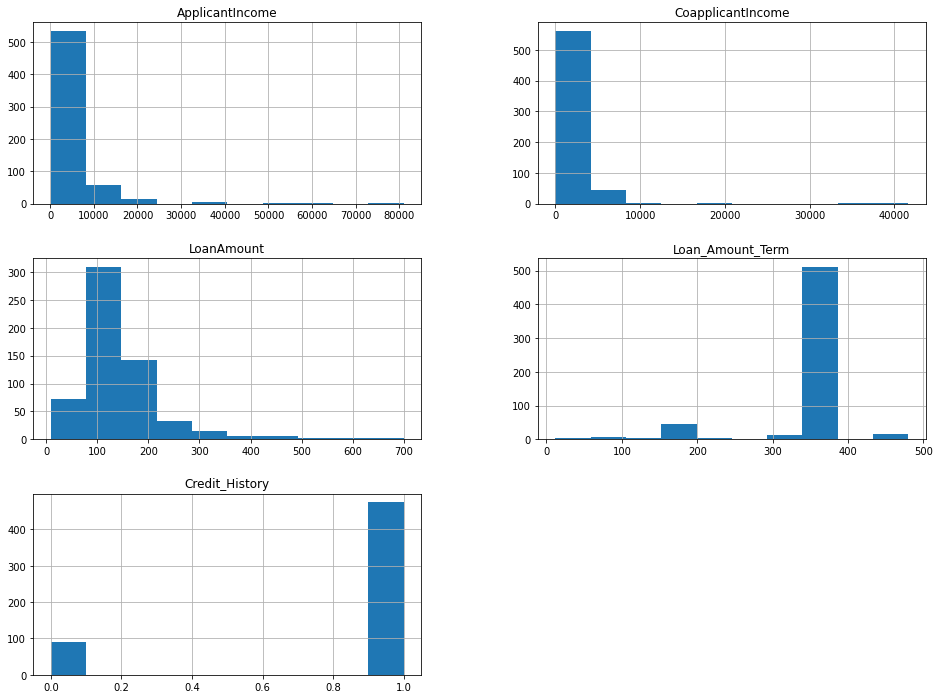

In [11]:
dataset.hist(figsize=(16,12))

In [12]:
dataset.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


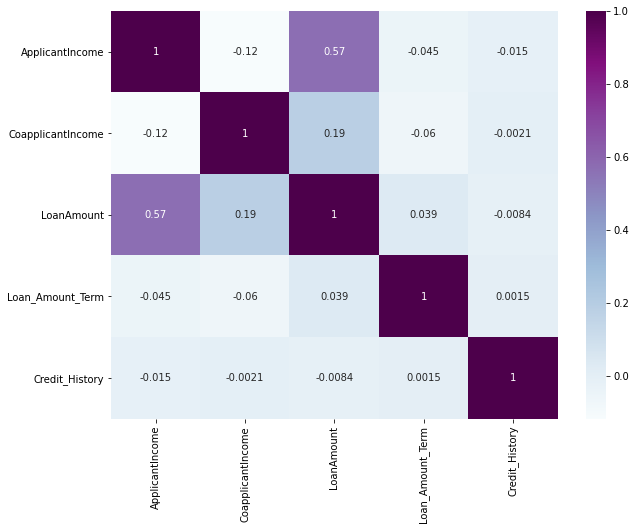

In [13]:
plt.figure(figsize=(10,7.5))
sns.heatmap(dataset.corr(), cmap = 'BuPu', annot = True)

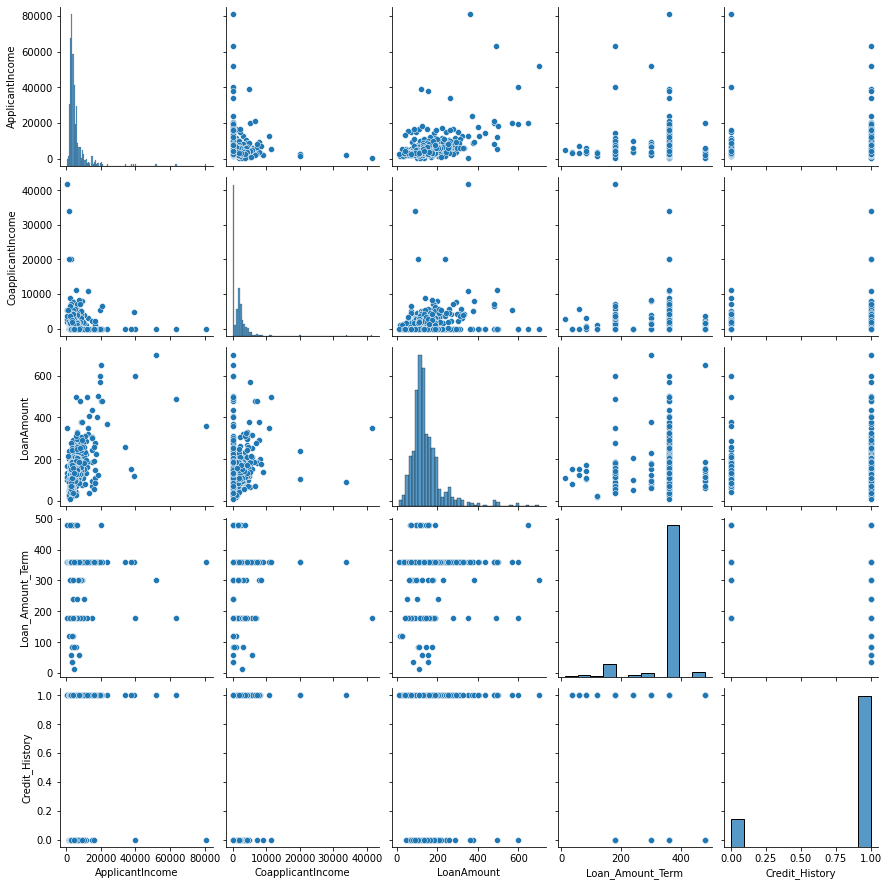

In [14]:
sns.pairplot(dataset)

**Data Preprocessing**

In [15]:
dataset = dataset.drop(['Loan_ID'], axis=1)

In [16]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [17]:
dataset = pd.get_dummies(dataset,drop_first=True)
dataset.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [18]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)
print('Splitted Train-Test dataset details:')
print('Num of dataset in X -Train:', np.shape(X_train))
print('Num of dataset in Y -Train:', np.shape(y_train))
print('Num of dataset in X -Test:', np.shape(X_test))
print('Num of dataset in y -Test:', np.shape(y_test))

Splitted Train-Test dataset details:
Num of dataset in X -Train: (429, 14)
Num of dataset in Y -Train: (429,)
Num of dataset in X -Test: (185, 14)
Num of dataset in y -Test: (185,)


In [20]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test = imp_train.transform(X_test)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [23]:
print('Explained variation: {}'.format(pca.explained_variance_ratio_))

Explained variation: [0.13501052 0.11318825 0.10511315 0.0870758  0.08372192 0.07932189
 0.07047119 0.0682643  0.06469839 0.05514058 0.05137534 0.03479072
 0.03019588 0.02163207]


**Modeling**

**Decision Tree**

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
dt=accuracy_score(y_test,y_pred)

[[ 28  23]
 [ 21 113]]


**K Nearest Neighbours**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
y_pred1 = classifier1.predict(X_test)

In [29]:
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
knn=accuracy_score(y_test,y_pred1)

[[ 19  32]
 [ 11 123]]


**Support Vector Machine**

In [30]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear',random_state =0)
classifier2.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
y_pred2 = classifier2.predict(X_test)

In [32]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
svma=accuracy_score(y_test,y_pred2)

[[ 21  30]
 [  2 132]]


**Kernel SVM - RBF**

In [33]:
classifier3 = SVC(kernel='rbf',random_state=0)
classifier3.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
y_pred3 = classifier3.predict(X_test)

In [35]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
svmrbf=accuracy_score(y_test,y_pred3)

[[ 22  29]
 [  4 130]]


**Kernel SVM - Poly**

In [36]:
classifier4 = SVC(kernel='poly',degree=3,random_state=0)
classifier4.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
y_pred4 = classifier4.predict(X_test)

In [38]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
svmpoly=accuracy_score(y_test,y_pred4)

[[ 22  29]
 [  7 127]]


**Kernel SVM - Sigmoid**

In [39]:
classifier5 = SVC(kernel='sigmoid',random_state=0)
classifier5.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
y_pred5 = classifier5.predict(X_test)

In [41]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)
svmsig=accuracy_score(y_test,y_pred5)

[[ 24  27]
 [  3 131]]


**Naive Bayes**

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier6 = GaussianNB()
classifier6.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred6 = classifier6.predict(X_test)

In [44]:
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)
nb=accuracy_score(y_test,y_pred6)

[[ 25  26]
 [ 11 123]]


**Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression
classifier7 = LogisticRegression()
classifier7.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred7 = classifier7.predict(X_test)


In [47]:
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)
logreg=accuracy_score(y_test,y_pred7)

[[ 23  28]
 [  2 132]]


**Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier8 = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier8.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
y_pred8 = classifier8.predict(X_test)

In [50]:
cm8 = confusion_matrix(y_test, y_pred8)
print(cm8)
rf=accuracy_score(y_test,y_pred8)

[[ 28  23]
 [ 24 110]]


In [51]:
print('Accuracy for Decision Tree model = ', dt*100)
print('Accuracy for K Nearest Neighbor = ', knn*100)
print('Accuracy for Support Vector Machine = ',svma*100)
print('Accuracy for Kernel SVM - RBF =',svmrbf*100)
print('Accuracy for Kernel SVM - poly =',svmpoly*100)
print('Accuracy for Kernel SVM - sigmoid =',svmsig*100)
print('Accuracy for Naive Bayes=',nb*100)
print ('Accuracy for Logistic Regression =', logreg*100)
print('Accuracy for Random Forest =',rf*100)

Accuracy for Decision Tree model =  76.21621621621621
Accuracy for K Nearest Neighbor =  76.75675675675676
Accuracy for Support Vector Machine =  82.70270270270271
Accuracy for Kernel SVM - RBF = 82.16216216216216
Accuracy for Kernel SVM - poly = 80.54054054054053
Accuracy for Kernel SVM - sigmoid = 83.78378378378379
Accuracy for Naive Bayes= 80.0
Accuracy for Logistic Regression = 83.78378378378379
Accuracy for Random Forest = 74.5945945945946


Hope the procedure will help you out in solving classification problem

**Premanand S**